# Supervised Machine Learning 
#### Using different classifiers and seeing how they preform on labeled data

In [153]:
#necessary libraries 

import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind

After getting all the necessary data with Spotify API, framing and labelling ('Spotify API.ipynb' notebook), we can import csv file 

In [3]:
#import dataset created in other jupyter notebook
data = pd.read_csv('../data/my_data.csv')

In [4]:
data

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
0,0TLAptKgYxe7F0KewWH6X6,I Need A Forest Fire,Bon Iver,0.293,0.290,2,-11.596,1,0.69600,0.875000,0.1000,0.0373,128.276,257220,4,1
1,2y0rHDTckWQ7of6tI1yc82,Naked Life,Oko Ebombo,0.624,0.321,0,-9.776,1,0.46300,0.056000,0.1030,0.3040,73.996,255030,4,1
2,5nVE45ithgyVocZp5XLAk6,The Bug Collector,Haley Heynderickx,0.538,0.419,10,-9.705,1,0.77700,0.329000,0.0967,0.5290,99.622,228460,4,1
3,66VuLX5s1nrZzzQqJqPbri,Simply Are,Arto Lindsay,0.682,0.694,7,-11.393,0,0.28900,0.714000,0.0961,0.9540,173.851,224107,4,1
4,0X61Ud5Uzv44RvY3s1SsuO,Imogen,Nick Mulvey,0.493,0.584,5,-6.894,1,0.85000,0.000353,0.1140,0.2340,86.909,255533,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,3485UyMhs2ZF50l9sIZEys,FINAIS,benji price,0.750,0.615,11,-7.532,0,0.64200,0.000000,0.2380,0.8330,75.986,207749,4,0
2641,7szuecWAPwGoV1e5vGu8tl,In Your Eyes,The Weeknd,0.667,0.719,7,-5.371,0,0.00285,0.000081,0.0736,0.7170,100.021,237520,4,0
2642,4Ty4XfOHdUFIXmVtBIFMIG,XPIDI,benji price,0.840,0.475,5,-6.665,0,0.64100,0.000000,0.0983,0.8820,77.006,172064,4,0
2643,1xQ6trAsedVPCdbtDAmk0c,Savage Love (Laxed - Siren Beat),Jason Derulo,0.767,0.481,0,-8.520,0,0.23400,0.000000,0.2690,0.7610,150.076,171375,4,0


##### Split the dataset: Test and Training data

In order to make any classifier work, we need to split our data into a training and testing set so we have some data to train our model with and some data to test the aforementioned model. 


This can be accomplished with an sklearn function called train_test_split() which splits the data according to a test_size percent specified in the method. The code below breaks up the data into 90% train, 10% test.

In [27]:
features = ['danceability', 'energy', 'key','loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

In [28]:
X = data[features]
y = data['Like']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)

## Logistic Regression

In [108]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
lr_pred = lr_model.predict(X_test)
score = metrics.accuracy_score(y_test, lr_pred)*100


print("Accuracy using Logistic Regression: ", round(score, 3), "%")

Accuracy using Logistic Regression:  80.0 %


In [110]:
logistic_regression = sm.Logit(y_train,sm.add_constant(X_train))
result = logistic_regression.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.401179
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Like   No. Observations:                 2380
Model:                          Logit   Df Residuals:                     2367
Method:                           MLE   Df Model:                           12
Date:                Wed, 08 Jul 2020   Pseudo R-squ.:                  0.4212
Time:                        16:50:46   Log-Likelihood:                -954.81
converged:                       True   LL-Null:                       -1649.6
Covariance Type:            nonrobust   LLR p-value:                2.355e-290
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.4074      1.042      3.270      0.001       1.365       5.450
danceabilit

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


##### Significant Independent Variables:
- danceability
- energy
- loudness
- acousticness
- instrumentalness
- valence

This results confirm what we've seen in the Exploratory Analysis for each variable.

## Decision Tree Classifier

- A decision tree classifier is often the easiest to visualize, so we will start with it first
- All it is is pretty much a decision tree based off the features so you can trace the path down and visually see how it makes decisions. This is nice to visualize but it isn't all that good at predicting this data.

In [143]:
model = DecisionTreeClassifier(max_depth = 8)
model.fit(X_train, y_train)

score = model.score(X_test,y_test)*100

print("Accuracy using Decision Tree: ", round(score, 2), "%")

Accuracy using Decision Tree:  81.89 %


In [144]:
max_depth = range(1,10)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth= depth,max_features = 'auto')
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

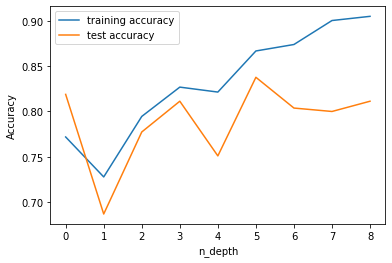

In [145]:
import matplotlib.pyplot as plt
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

# we quickly see underfitting properties

In [114]:
!pip install mglearn

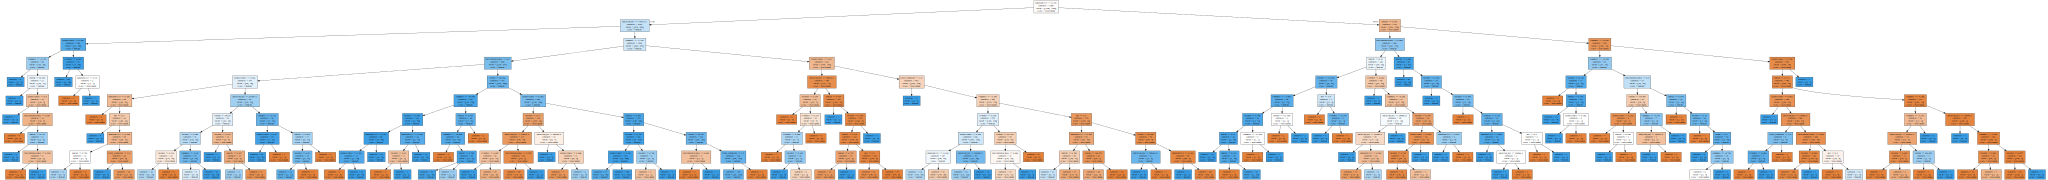

In [146]:
export_graphviz(model, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names = data[features].columns, impurity=False, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)  

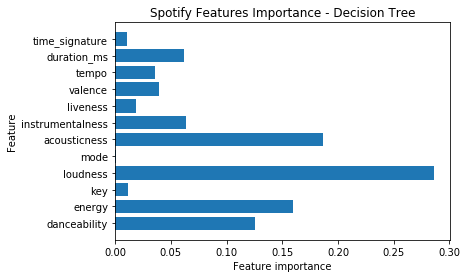

In [147]:
def plot_feature_importances(model):
    n_features = data[features].shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title("Spotify Features Importance - Decision Tree")
plot_feature_importances(model)

## Support Vector Machine

Support-vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

In [152]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[111  41]
 [ 33  80]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       152
           1       0.66      0.71      0.68       113

    accuracy                           0.72       265
   macro avg       0.72      0.72      0.72       265
weighted avg       0.72      0.72      0.72       265



## K-Nearest Neighbors (KNN)

The K-Nearest Neighbors classifier looks at the neighbors of a data point in order to determine what the output is. So in our case, it takes in a new songs audio features, plots it and looks at the songs around it to figure out if I will like it or not.

In [82]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
knn_pred = c.predict(X_test)
score_test_knn = accuracy_score(y_test, knn_pred) * 100

print("Accuracy using Knn Tree: ", round(score_test_knn, 3), "%")


#a bit better than Logistic Regression

Accuracy using Knn Tree:  80.377 %


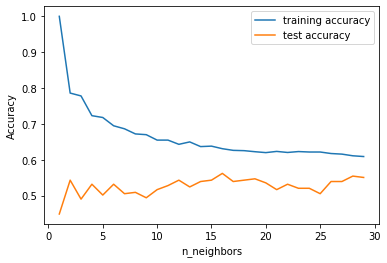

In [66]:
import matplotlib.pyplot as plt

# hyerparameter tuning
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 30)
for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  #training the model
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### AdaBoostClassifier and GradientBoostingClassifier

Both of these classifiers operate in a similar way. They both start by creating a relatively weak “learner” (something used to make predictions) and then use the results of classifying to modify the “learner” and make it better at predicting things in the future.

- AdaBoost works by fitting that learner and then between every iteration of the data, it modifies the way it predicts in order to try and classify the more difficult cases with a better accuracy. 
- Gradient Boosting uses the loss function (a measure of how far off the prediction was from the true value) and tries to reduce that loss function with each iteration. 

In [80]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, ada_pred) * 100
print("Accuracy using ada: ", round(score, 1), "%")

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
predicted = gbc.predict(X_test)
score = accuracy_score(y_test, predicted)*100
print("Accuracy using Gbc: ", round(score, 1), "%")

Accuracy using ada:  84.2 %
Accuracy using Gbc:  85.7 %


## RANDOM FOREST

The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random:
- Random sampling of training data points when building trees
- Random subsets of features considered when splitting nodes



In [170]:
model=RandomForestClassifier(n_estimators=100)
model = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)*100

print("Accuracy with Random Forest:", round(score, 4), "%")

Accuracy with Random Forest: 86.0377 %


In [171]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[133  19]
 [ 18  95]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       152
           1       0.83      0.84      0.84       113

    accuracy                           0.86       265
   macro avg       0.86      0.86      0.86       265
weighted avg       0.86      0.86      0.86       265



In [172]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 488
Average maximum depth 17


In [173]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
1,energy,0.207103
3,loudness,0.190262
5,acousticness,0.158537
6,instrumentalness,0.124580
0,danceability,0.083600
8,valence,0.056604
10,duration_ms,0.055885
9,tempo,0.048366
7,liveness,0.039785
2,key,0.024247


Compared to the single decision tree, the model has fewer false postives although more false negatives. Overall, the random forest does significantly better than a single decision tree. This is what we expected!



## Check Results

In [174]:
predict_df = X_test
predict_df['prediction'] = y_pred
predict_df['Like'] = data['Like']
predict_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,prediction,Like
2578,0.672,0.7410,11,-6.449,0,0.080300,0.000000,0.1320,0.380,103.018,191253,4,0,0
457,0.512,0.7060,6,-5.244,1,0.027500,0.000049,0.1640,0.703,114.036,167133,4,0,1
670,0.638,0.6680,2,-3.442,1,0.082200,0.000000,0.0815,0.299,113.945,208766,4,0,1
2597,0.776,0.6960,7,-6.533,0,0.300000,0.000003,0.1090,0.578,95.985,198720,4,0,0
92,0.466,0.0528,0,-12.281,1,0.186000,0.168000,0.1600,0.729,140.765,407440,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,0.298,0.9700,1,-6.866,1,0.000987,0.088400,0.3040,0.156,174.148,348682,4,0,0
1339,0.722,0.7570,0,-3.592,0,0.170000,0.000013,0.0657,0.763,167.987,202308,4,0,0
2037,0.527,0.4120,1,-8.965,1,0.684000,0.000002,0.1340,0.213,137.893,263658,3,1,0
715,0.652,0.9090,10,-5.506,0,0.296000,0.002050,0.2690,0.868,173.824,210000,4,0,1


In [175]:
predict_df = predict_df.merge(data[['title','main_artist']], left_index=True, right_index=True)

final_prediction = predict_df[['title','main_artist','Like','prediction']]
final_prediction['Check'] = np.where(final_prediction['prediction']==final_prediction['Like'], 'Correct', 'Wrong')
wrong_pred = final_prediction[final_prediction['Check'] == 'Wrong']

wrong_titles = list(wrong_pred['title'])
wrong_pred

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,title,main_artist,Like,prediction,Check
457,Nem Fé nem Santo,Mallu Magalhães,1,0,Wrong
670,Cigarette Daydreams,Cage The Elephant,1,0,Wrong
2018,Eu Gosto de Ti,ELAS,0,1,Wrong
1047,Conto de Fadas de Sintra a Lisboa,Os Pontos Negros,1,0,Wrong
2290,Love You to Death,Type O Negative,0,1,Wrong
522,Você Não Entende Nada - Multishow Ao Vivo,Caetano Veloso,1,0,Wrong
2180,Man On The Silver Mountain,Rainbow,0,1,Wrong
1880,"I'm Not a Girl, Not Yet a Woman",Britney Spears,0,1,Wrong
998,Parking Lot,Anderson .Paak,1,0,Wrong
1010,Trouble Woman,Sweet Barrio,1,0,Wrong
